This Assignment is looking at a 2-mode network of Southern Club Women attending social events
Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis
Data can be found here: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat

I will look at the data, convert it to a matrix, turn it from a 2-mode network into one and examine
who has attended the same events with other people.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


Read Data and extract information from it

In [2]:
davis = open('davis.dat.txt','ro')
lines = davis.readlines()

Grab row and column labels and remove escape characters from the labels

In [3]:
row_labels = lines[4:22]
row_labels = [x.rstrip() for x in row_labels]

column_labels = lines[23:37]
column_labels = [x.rstrip() for x in column_labels]

data = lines[38:57]

Convert the data to a 18x14 matrix to make a adjacency matrix

In [4]:
matrix = np.loadtxt(data, dtype=int)

In [5]:
matrix_t = matrix.transpose()
adj_matrix = np.matmul(matrix, matrix_t)
print "Original Dataset 2-mode network as a matrix:"
print matrix

Original Dataset 2-mode network as a matrix:
[[1 1 1 1 1 1 0 1 1 0 0 0 0 0]
 [1 1 1 0 1 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [1 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 1 1 1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 0 1 1 1]
 [0 0 0 0 0 1 1 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0]]


Make a dataset out of it and add row and column labels

In [6]:
dataset = pd.DataFrame(data=adj_matrix, index=row_labels, columns=row_labels)
print dataset

           EVELYN  LAURA  THERESA  BRENDA  CHARLOTTE  FRANCES  ELEANOR  PEARL  \
EVELYN          8      6        7       6          3        4        3      3   
LAURA           6      7        6       6          3        4        4      2   
THERESA         7      6        8       6          4        4        4      3   
BRENDA          6      6        6       7          4        4        4      2   
CHARLOTTE       3      3        4       4          4        2        2      0   
FRANCES         4      4        4       4          2        4        3      2   
ELEANOR         3      4        4       4          2        3        4      2   
PEARL           3      2        3       2          0        2        2      3   
RUTH            3      3        4       3          2        2        3      2   
VERNE           2      2        3       2          1        1        2      2   
MYRNA           2      1        2       1          0        1        1      2   
KATHERINE       2      1    

let's try to compute the sum of rows in the dataset; this will show us
how many events have they been to amongst other people

In [7]:
print "Number of times each person attended a event with at least someone else:"
print dataset.sum()

Number of times each person attended a event with at least someone else:
EVELYN       58
LAURA        52
THERESA      65
BRENDA       53
CHARLOTTE    28
FRANCES      36
ELEANOR      40
PEARL        34
RUTH         44
VERNE        43
MYRNA        39
KATHERINE    47
SYLVIA       57
NORA         55
HELEN        49
DOROTHY      39
OLIVIA       16
FLORA        16
dtype: int64


Make a graph out of this dataset

In [8]:
G = nx.from_pandas_adjacency(dataset)
print nx.info(G)
pos = nx.spring_layout(G)

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 157
Average degree:  17.4444


We see that thi is nearly a complete graph based on the average degree.
Theresa attended the most events with people followed by Evelyn, Sylvia and Nora as of the top 4.
Let's plot the whole graph first and let's see if any nodes are of interest.

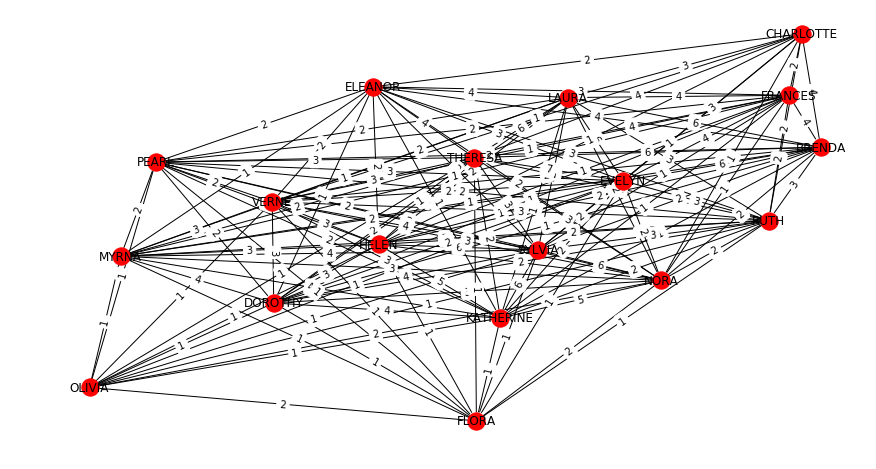

In [17]:
%matplotlib inline
plt.figure(figsize=(50,8))
plt.subplot(1,3,1)
nx.draw(G, pos, with_labels=True)
# edge weights
nx.draw_networkx_edge_labels(G, pos, edge_labels = {(u,v): d['weight'] for u,v,d in G.edges(data=True)})
plt.show()

If we look at the dataset what is most interesting is that Olivia and Flora attended the least events with other people and the number of events with the same exact people.

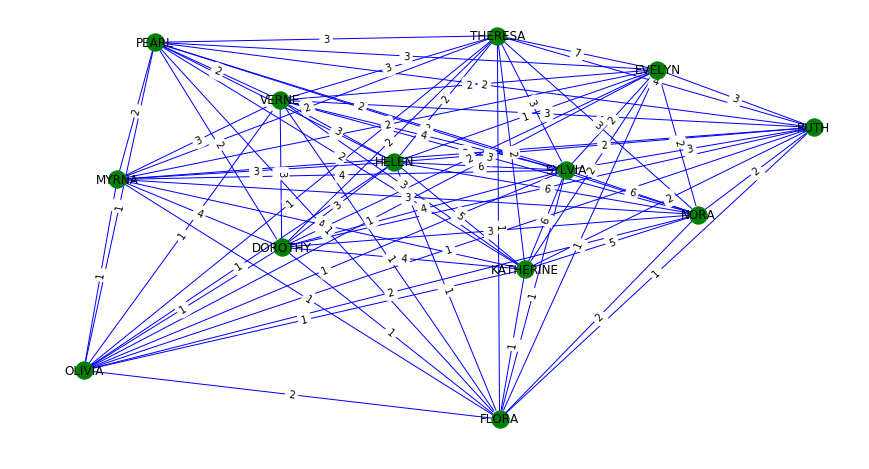

In [18]:
# let's make a subgraph from these two people
%matplotlib inline
plt.figure(figsize=(50,8))
plt.subplot(1,3,2)
olivia = G.subgraph(G['OLIVIA'])
nx.draw(olivia, pos=pos, node_color = 'green', edge_color = 'blue', with_labels=True)
nx.draw_networkx_edge_labels(olivia, pos, 
                             edge_labels = {(u,v): d['weight'] for u,v,d in olivia.edges(data=True)})                             
plt.show()

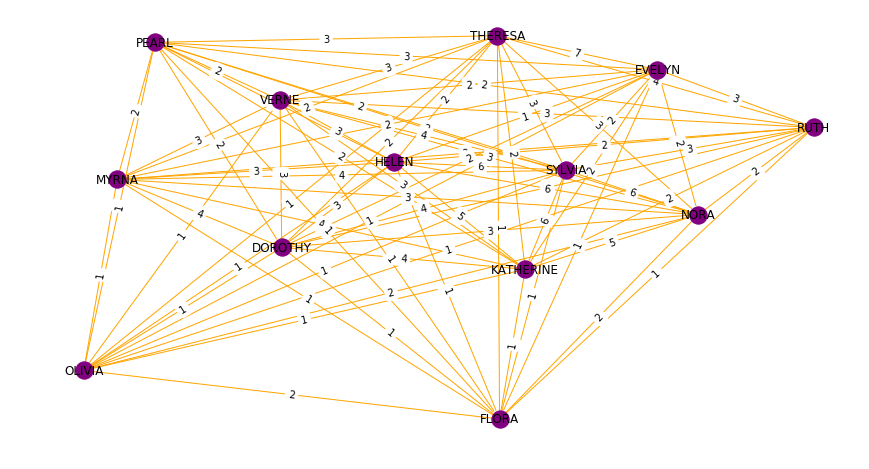

In [19]:
%matplotlib inline
plt.figure(figsize=(50,8))
plt.subplot(1,3,3)
flora = G.subgraph(G['FLORA'])
nx.draw(flora, pos=pos, node_color = 'purple', edge_color = 'orange', with_labels=True)
nx.draw_networkx_edge_labels(flora, pos, 
                             edge_labels = {(u,v): d['weight'] for u,v,d in flora.edges(data=True)})
plt.show()

To me, the social events had a good attendance. Most of the women attended at least one event with all other women. Whatever events Fiona and Olivia went to they were together. I'd say they would be of social interest 